<a href="https://colab.research.google.com/github/nando645/P4_Kamis_FGD1/blob/main/P4_Kamis_FGD1_Logistic_Regression_Kel1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing Libraries
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

# Load Dataset

In [ ]:
#Splitting Data
# download dataset from - 

df = pd.read_csv('https://raw.githubusercontent.com/TarekDib03/Analytics/master/Week3%20-%20Logistic%20Regression/Data/framingham.csv')

In [ ]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [ ]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

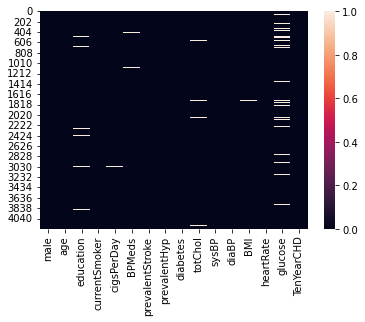

In [ ]:
sns.heatmap(df.isnull())

In [ ]:
df.drop(["education"], axis=1, inplace=True)

In [ ]:
df['cigsPerDay'].fillna(value=df['cigsPerDay'].mean(), inplace=True)
df['BPMeds'].fillna(value=df['BPMeds'].mean(), inplace=True)
df['totChol'].fillna(value=df['totChol'].mean(), inplace=True)
df['BMI'].fillna(value=df['BMI'].mean(), inplace=True)
df['heartRate'].fillna(value=df['heartRate'].mean(), inplace=True)
df['glucose'].fillna(value=df['glucose'].mean(), inplace=True)

In [ ]:
df.isnull().sum()

male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

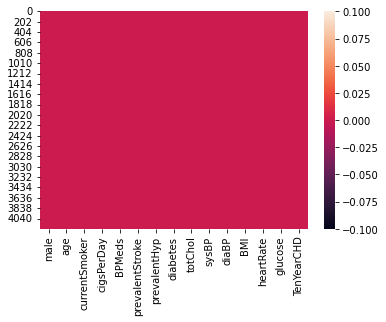

In [ ]:
sns.heatmap(df.isnull())

In [ ]:
df.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


# Training & Testing Model

In [ ]:
from sklearn.model_selection import train_test_split
x = df.iloc[:,:-1]
y= df.iloc[:,-1]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter=100, class_weight="balanced")
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


<br><br><br><br>
## Evalution Metrics for Logistic Regression
***

* As we already know, we use different metrics for regression and classification
* We know that we can use `MSE` for regression problems and `Accuracy` for classification problems
* However, these might not be the best metrics in every situation<br><br>

## Evalution Metrics for Logistic Regression
***

* Following are the types of Classification Metrics :
    * Confusion Matrix
    * Classification Matrix
    * F1 Score
    * Area under ROC curve
    * Classification Report
    * Logarithmic Loss

<br><br><br><br>

### Confusion Matrix
***
- The confusion matrix is a handy presentation of the accuracy of a model with two or more classes. Below is an example of a Confusion Matrix 
<br><br>


| Value | Fraud  | Not Fraud |
|---|---|---|
| Predicted Fraud | 1 | 1 |
| Predicted Not Fraud | 2 | 996 |


    True Positives (TP): These are predicted yes and actually yes (Top Left)
    True Negatives (TN): We predicted no, and actually no (Top Right) 
    False Positives (FP): We predicted yes, but actually no. (AKA "Type I error.") (Top Right) 
    False Negatives (FN): We predicted no, but yes. (AKA"Type II error.") (Bottom Left)


### Confusion Matrix
***
* Classification accuracy is the number of correct predictions **(TN + TP)** made as a ratio of all predictions made. **(TN + TP +FN + FP)**<br><br>
It is suitable when :
* There are an equal number of observations in each class
* That all predictions and prediction errors are equally important,which is often not the case.

In [ ]:
# Applying confusion matrix on above data
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[459, 254],
       [ 47,  88]])

### Precision
***

$$Precision = \frac {(True +ves)} {(True +ves  +  False +ves)}$$



In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score
print(f"Precision Score: {precision_score(y_test,y_pred)}")

Precision Score: 0.2573099415204678


### Recall 
***

$$Recall = \frac {(True +ves)} {(True +ves  +  False -ves)}$$

In [ ]:
print(f"Recall Score: {recall_score(y_test,y_pred)}")

Recall Score: 0.6518518518518519


### Accuracy

In [ ]:
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))

Accuracy Score : 0.6450471698113207


## Trade - Off: Precision Vs. Recall 
***
- This is more of a in-class activity! 
- Think about this: What happens if we get an increased value of Precision? Do you think that would lower Recall? And vice-versa? 

- Think of an example! And use easy numerical calculations too. You can just use a pencil and paper, no need for code! 

- [**Hint**: There is a trade-off!] 

### F1 Score
***
 - To deal with this Trade-off we calculate something known as the F-1 Score: F1 score is a good approach to minimize a bias towards either the Precision or the Recall

 $$F1 Score = \frac {2PR} {P + R} $$

***
F1 Score is defined as 

<center>$2*\frac{precision*recall}{precision+recall}$</center>

* tp = true positive
* tn = true negative
* fp = false positive
* fn = false negative


***
- Using this intuition, we want to calculate the F-1 Score to better understand the evaluation of our model

- Let's see how to implement this in Python! 

In [ ]:
## code for f-1 score

from sklearn.metrics import f1_score
f1_score(y_test,y_pred)

0.3689727463312369

## Area under ROC Curve
***
ROC (Receiver Operating Characteristic) Curve tells us about how good the model can distinguish between two things (e.g If a patient has a disease or no). Better models can accurately distinguish between the two. Whereas, a poor model will have difficulties in distinguishing between the two.
Area under ROC Curve (or AUC for short) is a performance metric for binary classification problems.
- The AUC represents a model’s ability to discriminate between positive and negative classes.
 - An area of 1.0 represents a model that made all predictions perfectly. An area of 0.5 represents a model as good as random.<br>
**Brain Teaser**: What does area < 0.5 signify?


***
ROC can be broken down into sensitivity and specificity. Let's understand these concepts.


## Sensitivity and Specificity.
Let us take an example of patients having a disease.

In simple terms, the proportion of patients that were identified correctly to have the disease (i.e. True Positive) upon the total number of patients who actually have the disease is called as Sensitivity or Recall.


Similarly, the proportion of patients that were identified correctly to not have the disease (i.e. True Negative) upon the total number of patients who do not have the disease is called as Specificity.


Trade-off between Sensitivity and Specificity
When we decrease the threshold, we get more positive values thus increasing the sensitivity. Meanwhile, this will decrease the specificity.

Similarly, when we increase the threshold, we get more negative values thus increasing the specificity and decreasing sensitivity.

## ROC 
ROC is nothing but a plot of sensitivity also known as True Positive Rate against (1-specficity) also known as False Positive Rate for different values of threshold.

In [ ]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=1)
metrics.auc(fpr, tpr)

0.6478053088151265

## Logarithmic Loss
***
Logarithmic loss (or logloss) is a performance metric for evaluating the predictions of probabilities of membership to a given class


Where,
* N is the number of samples or instances,
* M is the number of possible labels,
* y<sub>ij</sub> is a binary indicator of whether or not label j is the correct classification for instance i,
* p<sub>ij</sub> is the model probability of assigning label j to instance i.

 $$ Logloss=- \frac{1}{n}\sum_{i=1}^n[y_ilogp_{i}+(1-y_{i})log(1-p_{i})] $$



***
* The scalar probability between 0 and 1 can be seen as a measure of confidence for a prediction by an algorithm.<br>
* Predictions that are correct or incorrect are rewarded or punished proportionally to the confidence of the prediction.<br>
* logloss nearer to 0 is better, with 0 representing a perfect logloss. 

In [ ]:
from sklearn.metrics import log_loss
log_loss(y_test,y_pred)

12.259875934687953

### Thank you!